In [1]:
!pip install gower

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from gower import gower_matrix
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram

In [117]:
data=pd.read_csv('online_shoppers_intention (1).csv')
df=data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]

In [115]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


## Análise descritiva

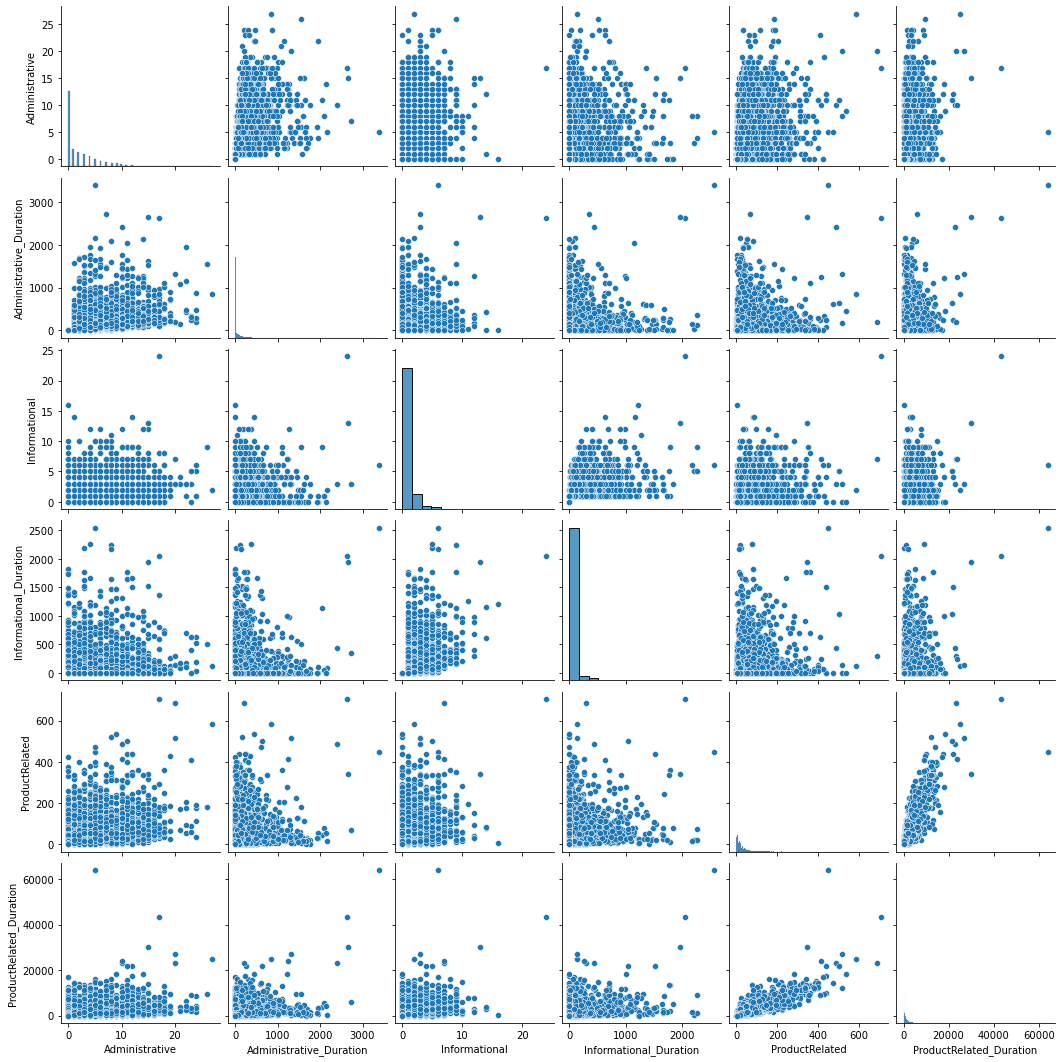

In [116]:
sns.pairplot(df)

- É possivel verificar que as variáveis estão em escala diferentes. Sendo necessário padronizar. 

In [156]:
data.groupby('Revenue')['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration'].mean()

C:\Users\General\AppData\Local\Temp\ipykernel_8800\1109521986.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Revenue')['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration'].mean()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
Revenue,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615



- Clientes com historico de navegação em paginas de produtos passam mais tempo em tela e compram mais em comparação aos demais perfis. 

## Tratamento e seleção de variáveis

In [134]:
#Verificando missing
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [120]:
#Transformando as variaveis bool em int
data['Weekend']=[1 if a else 0 for a in data['Weekend']]
#df['Revenue']=[1 if a else 0 for a in df['Revenue']]
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [127]:
#Separandos categoricos e transformandos em dummies
variaveis_cat=data.select_dtypes(include='O')
variaveis_cat_=pd.get_dummies(variaveis_cat)
df_tratado=pd.concat([data,variaveis_cat_],axis=1)
df_tratado.drop(columns=variaveis_cat.columns,axis=1,inplace=True)
df_tratado=df_tratado[['Administrative', 'Administrative_Duration',
                      'Informational','Informational_Duration','ProductRelated',
                      'ProductRelated_Duration', 'SpecialDay', 'Weekend', 'Month_Aug',
                      'Month_Dec', 'Month_Feb', 'Month_Jul','Month_June', 'Month_Mar', 'Month_May',
                      'Month_Nov', 'Month_Oct','Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
                      'VisitorType_Returning_Visitor']] #Essas são as variaveis que desejo incluir no modelo

In [136]:
df_tratado

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend,Month_Aug,Month_Dec,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [129]:
#Padronizando as variáveis
padronizador=StandardScaler()
df_padronizado=padronizador.fit_transform(df_tratado)#Padronizando a base de dados

In [132]:
data_pa=pd.DataFrame(df_padronizado,columns=df_tratado.columns)
data_pa

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend,Month_Aug,Month_Dec,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.308821,-0.550552,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.308821,-0.550552,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.308821,-0.550552,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,-0.308821,-0.550552,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.308821,1.816360,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.308821,1.816360,-0.190777,2.477811,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.308821,1.816360,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,1.764296,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,-0.308821,1.816360,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,1.764296,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.308821,-0.550552,-0.190777,-0.403582,...,-0.190548,-0.154649,-0.427739,-0.612532,1.764296,-0.215871,-0.194175,-0.399087,-0.083316,0.410621


In [140]:
columns_cat= [True if x in {'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'} else False for x in data_pa.columns]

In [141]:
distancia_gower=gower_matrix(data_pa,cat_features=columns_cat)

In [142]:
#Ajustando o formato da matriz de distancia para colocar no algoritmo
dga=squareform(distancia_gower,force='tovector')

In [143]:
Z=linkage(dga, method='complete')


## Número de grupos

In [146]:
data['grupos']=fcluster(Z,3,criterion='maxclust')
data.grupos.value_counts()

2    10548
3     1779
1        3
Name: grupos, dtype: int64

In [155]:
data.groupby(['grupos','Revenue'])['PageValues'].mean().unstack().fillna(0)

Revenue,False,True
grupos,,
1,0.254610,0.000000
2,2.065674,23.174969
3,1.372776,40.989718


In [148]:
data['grupos1']=fcluster(Z,4,criterion='maxclust')
data.grupos1.value_counts()

2    10548
4     1694
3       85
1        3
Name: grupos1, dtype: int64

In [153]:
data.groupby(['grupos1','Revenue'])['PageValues'].mean()

grupos1  Revenue
1        False       0.254610
2        False       2.065674
         True       23.174969
3        False       1.465247
         True       90.325123
4        False       1.367760
         True       39.119181
Name: PageValues, dtype: float64

In [152]:
data.groupby(['grupos1','Revenue'])['PageValues'].mean().unstack().fillna(0)

Revenue,False,True
grupos1,,
1,0.254610,0.000000
2,2.065674,23.174969
3,1.465247,90.325123
4,1.367760,39.119181


- Os clientes do grupos 3 em ambos dos agrupamento (agrupamento com 3/4 clusters) são mais propensos a realizar compras